In [1]:
import pandas as pd
df=pd.read_csv("invoice_payment_behavior_dataset_updated.csv")
df.head()

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,Late Fee
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392
3,INV122353,"Rogers, Downs and Chang",5760,2025-03-17,23,15,East Rachaelbury,Electronics,Yes,Cheque,Paid,4896.00,391
4,INV104233,Santana-Huff,5756,2024-09-21,21,5,Port Ashleystad,Software,No,Cheque,Paid,5468.20,630


In [2]:
df.shape

(30000, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice ID        30000 non-null  object 
 1   Client Name       30000 non-null  object 
 2   Invoice Amount    30000 non-null  int64  
 3   Payment Date      28532 non-null  object 
 4   Days Late         30000 non-null  int64  
 5   Discount          30000 non-null  int64  
 6   City              30000 non-null  object 
 7   Product Category  30000 non-null  object 
 8   Repeat Client     30000 non-null  object 
 9   Payment Method    30000 non-null  object 
 10  Payment Status    28434 non-null  object 
 11  Paid Amount       30000 non-null  float64
 12  Late Fee          30000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 3.0+ MB


In [4]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [5]:
df.columns

Index(['Invoice ID', 'Client Name', 'Invoice Amount', 'Payment Date',
       'Days Late', 'Discount', 'City', 'Product Category', 'Repeat Client',
       'Payment Method', 'Payment Status', 'Paid Amount', 'Late Fee'],
      dtype='object')

In [6]:
df.describe()

,Invoice Amount,Days Late,Discount,Paid Amount,Late Fee
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5294.406267,25.214633,5.607300,3024.430761,767.991700
std,4098.463802,26.486723,6.506917,3976.080741,863.600662
min,-883.000000,-10.000000,0.000000,-784.000000,0.000000
25%,3992.000000,7.000000,0.000000,0.000000,168.000000
50%,5016.000000,24.000000,5.000000,3330.000000,594.000000
75%,6034.000000,42.000000,10.000000,5033.875000,1166.000000
max,93900.000000,493.000000,89.000000,83172.500000,23232.000000


In [7]:
df["City"].unique()                 # to know the unique column 

array(['Parrishville', 'Smithhaven', 'Jasonchester', ...,
       'New Colleenton', 'Port Kellymouth', 'Taraberg'], dtype=object)

In [8]:
df["City"].nunique()

17853

In [9]:
df["City"].value_counts()   # to know how many of them belongs to same city

City
East Michael        36
West Michael        34
South Jennifer      26
South Michael       26
Port David          25
                    ..
Cowanmouth           1
North Thomasland     1
New Colleenton       1
Port Kellymouth      1
Perkinsland          1
Name: count, Length: 17853, dtype: int64

In [10]:
df.rename(columns={"Late Fee":"penality charge"},inplace=True)    #invoice amount=total amount,#paid amount=total amount after getting the discount
df.head(2)

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938


In [11]:
df["Product Category"].unique()

array(['Electronics', 'Consulting', 'Furniture', 'Software',
       'Office Supplies'], dtype=object)

In [12]:
df["Payment Method"].unique()

array(['Bank Transfer', 'Cheque', 'PayPal', 'Credit Card'], dtype=object)

In [13]:
df["Payment Status"].unique()

array(['Paid', 'Pending', 'Overdue', nan], dtype=object)

In [14]:
df["Client Name"].nunique()

23461

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Invoice ID        30000 non-null  object 
 1   Client Name       30000 non-null  object 
 2   Invoice Amount    30000 non-null  int64  
 3   Payment Date      28532 non-null  object 
 4   Days Late         30000 non-null  int64  
 5   Discount          30000 non-null  int64  
 6   City              30000 non-null  object 
 7   Product Category  30000 non-null  object 
 8   Repeat Client     30000 non-null  object 
 9   Payment Method    30000 non-null  object 
 10  Payment Status    28434 non-null  object 
 11  Paid Amount       30000 non-null  float64
 12  penality charge   30000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 3.0+ MB


In [16]:
#finding null values
df.isnull().sum() 

Invoice ID             0
Client Name            0
Invoice Amount         0
Payment Date        1468
Days Late              0
Discount               0
City                   0
Product Category       0
Repeat Client          0
Payment Method         0
Payment Status      1566
Paid Amount            0
penality charge        0
dtype: int64

In [17]:
df.iloc[1:39]

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392
3,INV122353,"Rogers, Downs and Chang",5760,2025-03-17,23,15,East Rachaelbury,Electronics,Yes,Cheque,Paid,4896.00,391
4,INV104233,Santana-Huff,5756,2024-09-21,21,5,Port Ashleystad,Software,No,Cheque,Paid,5468.20,630
5,INV114995,Lester-Nunez,3635,2024-10-24,56,5,Danielshire,Office Supplies,Yes,Bank Transfer,Paid,3453.25,2688
6,INV123614,"Stokes, Anderson and Shah",3739,2024-12-09,28,0,Fordfort,Furniture,Yes,PayPal,Pending,0.00,784
7,INV125547,Obrien-Dunlap,5068,2024-02-18,-7,5,Morganview,Electronics,Yes,Cheque,Paid,4814.60,0
8,INV121999,Jensen-Evans,5530,2025-05-01,12,0,Port Timothyport,Software,No,Credit Card,Paid,5530.00,240
9,INV126741,Rodriguez-Williams,2232,2025-03-24,56,15,East Brian,Software,Yes,Cheque,Overdue,0.00,1120
10,INV106111,"Mcdaniel, Nguyen and Moore",3102,2024-11-07,-4,0,Karenland,Consulting,Yes,Credit Card,Paid,3102.00,0


<Axes: xlabel='Payment Date', ylabel='Count'>

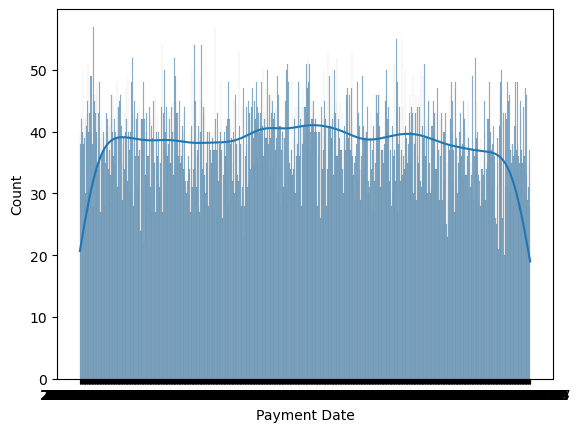

In [18]:
import seaborn as sns
sns.histplot(x="Payment Date",data=df,kde=True)

<Axes: xlabel='Payment Status', ylabel='Count'>

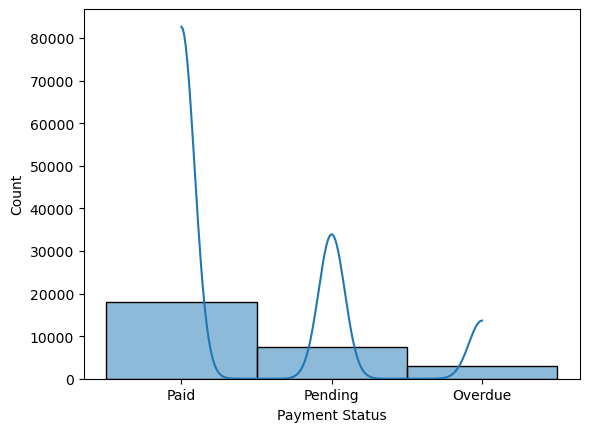

In [19]:
sns.histplot(x="Payment Status",data=df,kde=True)

In [20]:
#handling null values

In [21]:
# converting the datatype of the payment date
df["Payment Date"]=pd.to_datetime(df["Payment Date"])

In [22]:
df["year"]=df["Payment Date"].dt.year
df.head(3)

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864,2025.0
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938,2025.0
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392,2024.0


In [23]:
df.groupby("Product Category")["Payment Date"].mean()

Product Category
Consulting        2024-09-08 08:39:47.125800192
Electronics       2024-09-07 15:00:53.884533248
Furniture         2024-09-13 14:11:34.647887360
Office Supplies   2024-09-11 07:15:46.382092544
Software          2024-09-05 23:14:00.294840064
Name: Payment Date, dtype: datetime64[ns]

In [24]:
df["Payment Date"]=df["Payment Date"].fillna(df.groupby("Product Category")["Payment Date"].transform("mean"))

In [25]:
df.isnull().sum()

Invoice ID             0
Client Name            0
Invoice Amount         0
Payment Date           0
Days Late              0
Discount               0
City                   0
Product Category       0
Repeat Client          0
Payment Method         0
Payment Status      1566
Paid Amount            0
penality charge        0
year                1468
dtype: int64

In [26]:
df.iloc[130:159]

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year
130,INV109110,Obrien-Garcia,7772,2025-07-07 00:00:00.000000000,-9,10,East Robert,Software,Yes,Cheque,Overdue,0.00,0,2025.0
131,INV106227,Turner-Thompson,5590,2023-12-19 00:00:00.000000000,-2,5,Mooreview,Furniture,No,Credit Card,Paid,5310.50,0,2023.0
132,INV125564,Nash-Mcpherson,7047,2024-09-05 00:00:00.000000000,55,0,Donaldburgh,Software,Yes,Bank Transfer,Paid,7047.00,1320,2024.0
133,INV106569,Lang Group,6933,2025-05-29 00:00:00.000000000,48,15,Steveport,Electronics,Yes,Bank Transfer,Paid,5893.05,1824,2025.0
134,INV124948,"Moore, Keller and Oliver",7644,2023-12-03 00:00:00.000000000,49,0,Port Barbaraberg,Furniture,No,PayPal,Overdue,0.00,2205,2023.0
135,INV111055,"Phillips, Morales and Moore",3882,2025-03-06 00:00:00.000000000,6,5,Josephshire,Software,Yes,PayPal,Paid,3687.90,132,2025.0
136,INV104073,Wilson Group,4782,2023-11-18 00:00:00.000000000,51,0,New Nicole,Software,Yes,Credit Card,Paid,4782.00,2091,2023.0
137,INV111207,Cook-Ross,4115,2024-01-14 00:00:00.000000000,35,5,Kingberg,Consulting,Yes,PayPal,Paid,3909.25,560,2024.0
138,INV106992,Martinez and Sons,6418,2025-08-21 00:00:00.000000000,36,0,Morriston,Electronics,No,PayPal,Paid,6418.00,1116,2025.0
139,INV120380,"Francis, Paul and Williams",3255,2024-08-26 00:00:00.000000000,5,10,Sullivanport,Software,No,Bank Transfer,Paid,2929.50,185,2024.0


In [27]:
df["Payment Status"].mode()

0    Paid
Name: Payment Status, dtype: object

In [28]:
df["Payment Status"] = df["Payment Status"].fillna(df["Payment Status"].mode()[0])

In [29]:
df.isnull().sum()

Invoice ID             0
Client Name            0
Invoice Amount         0
Payment Date           0
Days Late              0
Discount               0
City                   0
Product Category       0
Repeat Client          0
Payment Method         0
Payment Status         0
Paid Amount            0
penality charge        0
year                1468
dtype: int64

In [30]:
df.groupby("Product Category")["Payment Date"].mean()

Product Category
Consulting        2024-09-08 08:39:47.125800192
Electronics       2024-09-07 15:00:53.884533248
Furniture         2024-09-13 14:11:34.647887104
Office Supplies   2024-09-11 07:15:46.382092800
Software          2024-09-05 23:14:00.294840320
Name: Payment Date, dtype: datetime64[ns]

In [31]:
df.groupby("City")["Paid Amount"].max()

City
Aaronberg         2992.85
Aaronborough         0.00
Aaronburgh           0.00
Aaronbury         4181.00
Aaronchester      5334.00
                   ...   
Zimmermanfurt        0.00
Zimmermanshire    6893.00
Zoemouth          5464.00
Zunigahaven          0.00
Zunigaport           0.00
Name: Paid Amount, Length: 17853, dtype: float64

In [32]:
df["month"]=df["Payment Date"].dt.month_name()
df.head()

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year,month
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864,2025.0,April
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938,2025.0,March
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392,2024.0,June
3,INV122353,"Rogers, Downs and Chang",5760,2025-03-17,23,15,East Rachaelbury,Electronics,Yes,Cheque,Paid,4896.00,391,2025.0,March
4,INV104233,Santana-Huff,5756,2024-09-21,21,5,Port Ashleystad,Software,No,Cheque,Paid,5468.20,630,2024.0,September


In [33]:
df.groupby("Product Category")["Discount"].sum()

Product Category
Consulting         34867
Electronics        33142
Furniture          32559
Office Supplies    34176
Software           33475
Name: Discount, dtype: int64

In [34]:
df.groupby("Product Category")["Payment Status"].value_counts()

Product Category  Payment Status
Consulting        Paid              3916
                  Pending           1530
                  Overdue            608
Electronics       Paid              3892
                  Pending           1433
                  Overdue            578
Furniture         Paid              3953
                  Pending           1451
                  Overdue            596
Office Supplies   Paid              3910
                  Pending           1523
                  Overdue            619
Software          Paid              3942
                  Pending           1470
                  Overdue            579
Name: count, dtype: int64

In [35]:
df.groupby("Payment Date")["Payment Method"].value_counts()

Payment Date  Payment Method
2023-09-10    Bank Transfer     14
              Cheque            10
              PayPal             6
              Credit Card        5
2023-09-11    Cheque            12
                                ..
2025-09-08    PayPal             8
2025-09-09    PayPal            11
              Credit Card        9
              Bank Transfer      6
              Cheque             3
Name: count, Length: 2944, dtype: int64

In [36]:
df.groupby("month")["Paid Amount"].sum()

month
April         7077771.87
August        7152758.57
December      7137353.01
February      6581535.72
January       7236398.81
July          7174460.06
June          7052613.79
March         7506959.80
May           7462409.83
November      7051323.40
October       7270549.23
September    12028788.75
Name: Paid Amount, dtype: float64

In [37]:

df.groupby("year")["Payment Status"].sum().idxmax()

np.float64(2023.0)

<Axes: xlabel='Invoice Amount'>

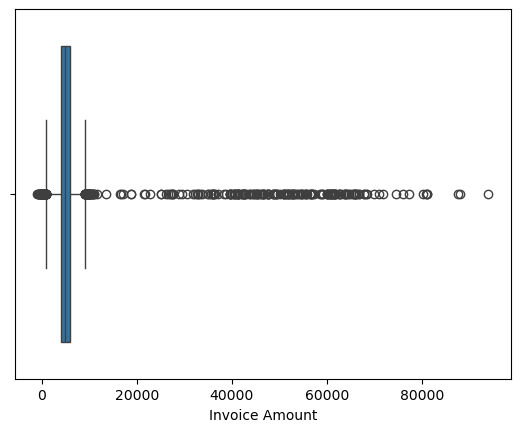

In [38]:
import seaborn as sns 
sns.boxplot(x="Invoice Amount",data=df)

<Axes: xlabel='Invoice Amount', ylabel='Count'>

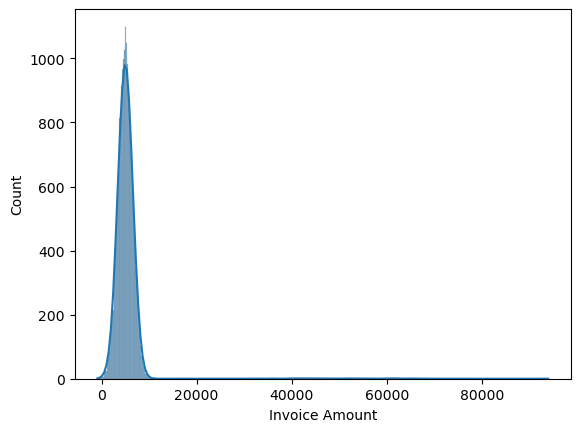

In [39]:
sns.histplot(x="Invoice Amount",data=df,kde=True)                # if need to handle -- zcore

<Axes: xlabel='Paid Amount'>

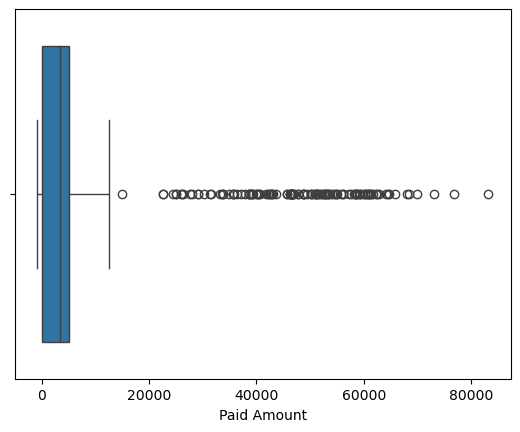

In [40]:
import seaborn as sns 
sns.boxplot(x="Paid Amount",data=df)                         #if needed to handle then IQR

<Axes: xlabel='Discount'>

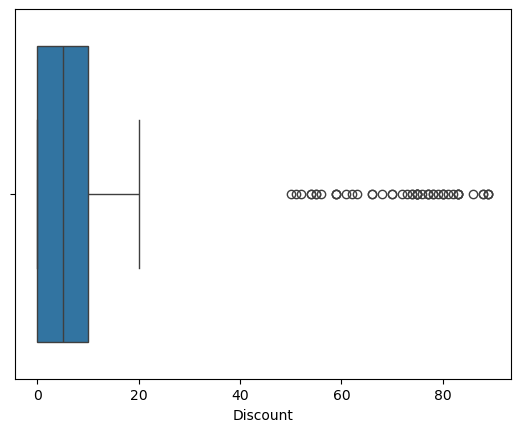

In [41]:
sns.boxplot(x="Discount",data=df)                           #IQR method to be used

<Axes: xlabel='Discount', ylabel='Count'>

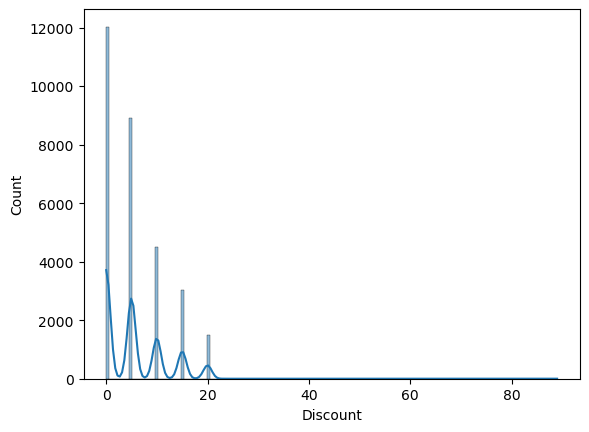

In [42]:
sns.histplot(x="Discount",data=df,kde=True)

<Axes: xlabel='penality charge'>

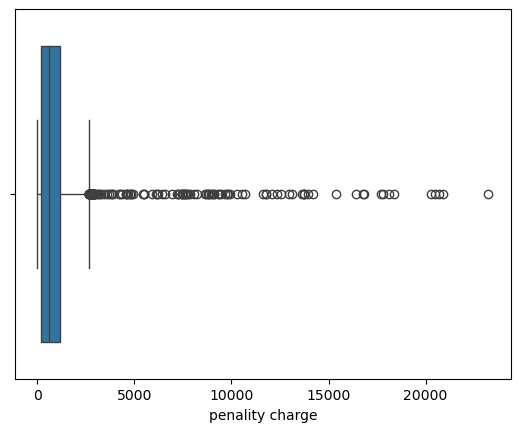

In [43]:
sns.boxplot(x="penality charge",data=df)                    #IQR

<Axes: xlabel='penality charge', ylabel='Count'>

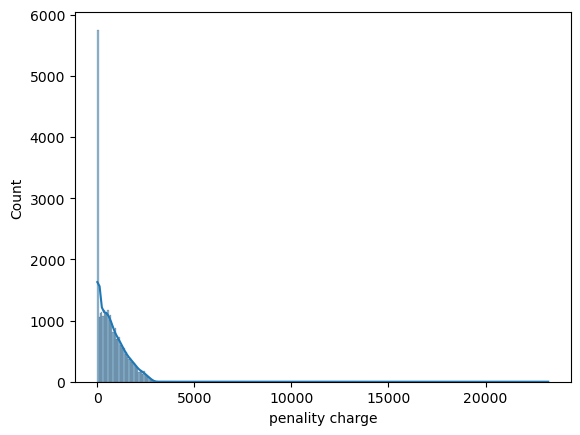

In [44]:
sns.histplot(x="penality charge",data=df,kde=True)

In [45]:
df.iloc[178]

Invoice ID                    INV102119
Client Name              Calderon-Baker
Invoice Amount                     4713
Payment Date        2024-04-16 00:00:00
Days Late                             8
Discount                             10
City                          West Erik
Product Category             Consulting
Repeat Client                       Yes
Payment Method                   Cheque
Payment Status                     Paid
Paid Amount                      4241.7
penality charge                     328
year                             2024.0
month                             April
Name: 178, dtype: object

In [46]:
#data visualization
#bar---  Product Category vs Paid Amount, year vs paid amount, payment method vs days late
# line--- month vs penalty charge, city vs pay 
#pie ---- penalty charge vs product category, days late vs payment category

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df1=df.groupby("Product Category")["Paid Amount"].sum().sort_values(ascending=False)
df1

Product Category
Furniture          18416911.73
Consulting         18268680.66
Software           18240030.05
Electronics        17958419.37
Office Supplies    17848881.03
Name: Paid Amount, dtype: float64

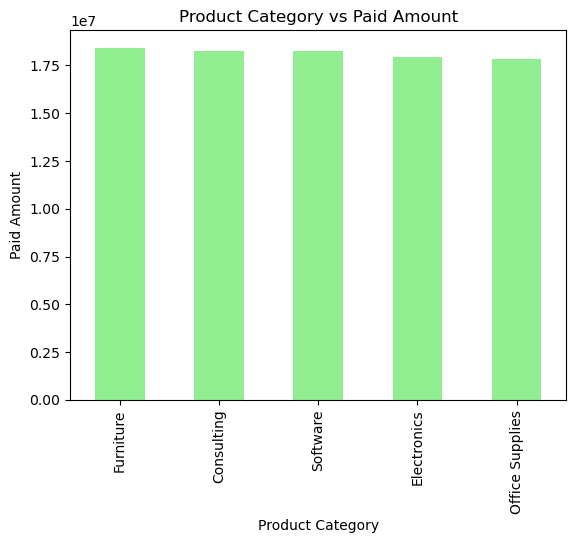

In [49]:
df1.plot(kind="bar",color="lightgreen")
plt.xlabel("Product Category")
plt.ylabel("Paid Amount")
plt.title("Product Category vs Paid Amount") 
plt.show()

In [50]:
df1=df.groupby("year")["Paid Amount"].sum().sort_values(ascending=True)
df1

year
2023.0    12918183.39
2025.0    29968503.94
2024.0    43333916.26
Name: Paid Amount, dtype: float64

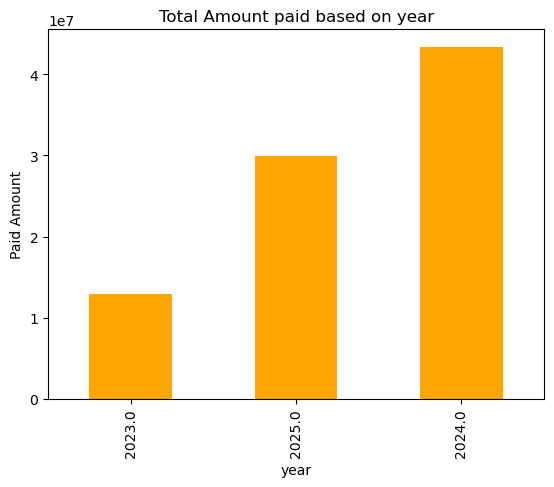

In [51]:
df1.plot(kind="bar",color="orange")
plt.xlabel("year")
plt.ylabel("Paid Amount")
plt.title("Total Amount paid based on year")
plt.show()

In [52]:
df2=df.groupby("Payment Method")["Days Late"].max()
df2

Payment Method
Bank Transfer    479
Cheque           484
Credit Card      474
PayPal           493
Name: Days Late, dtype: int64

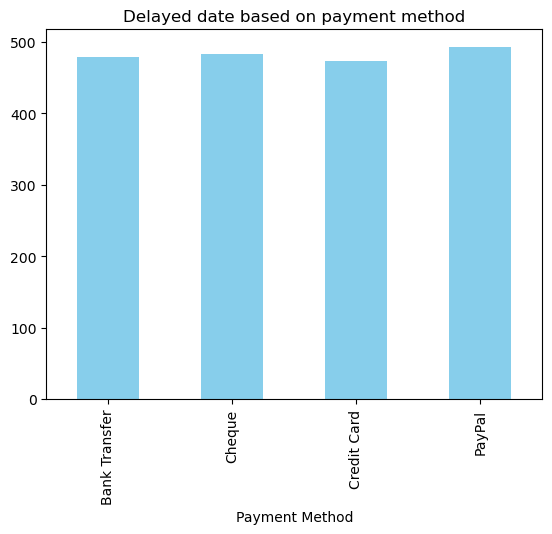

In [53]:
df2.plot(kind="bar",x="Payment Method", y="Days Late", color="skyblue")
plt.title("Delayed date based on payment method")
plt.show()

In [54]:
df2=df.groupby(df["month"])["penality charge"].sum().sort_values(ascending=False)
df2

month
September    2965564
December     1931802
August       1899065
October      1866149
January      1863516
May          1832652
February     1809223
June         1805063
November     1779930
July         1774758
March        1762589
April        1749440
Name: penality charge, dtype: int64

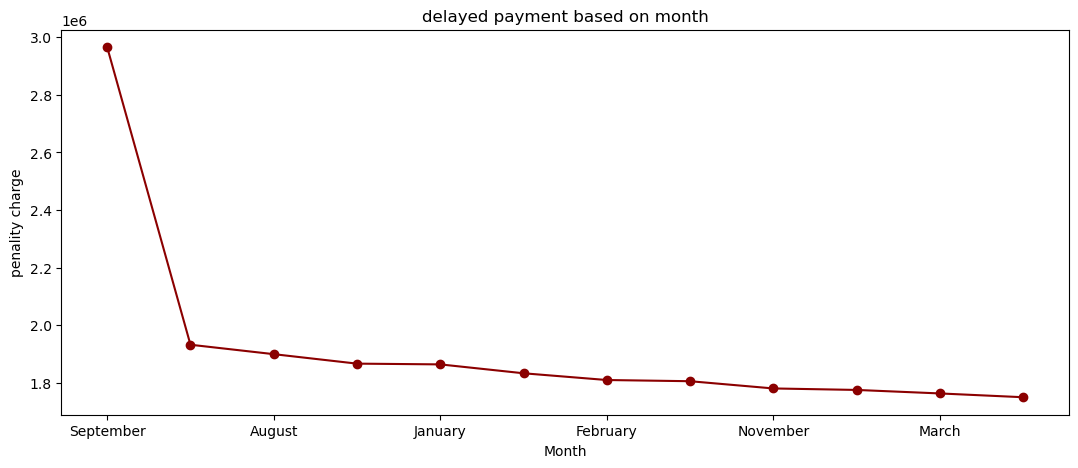

In [55]:
df2.plot(kind="line", figsize=(13,5), marker="o", color="darkred")
plt.title("delayed payment based on month")
plt.xlabel("Month")
plt.ylabel("penality charge")
plt.show()

In [56]:
dff1=df.groupby("month")["Payment Status"].value_counts().unstack()
dff1

Payment Status,Overdue,Paid,Pending
month,,,
April,195,1544,564
August,252,1559,605
December,248,1536,607
February,222,1437,595
January,223,1539,594
July,249,1569,563
June,246,1537,600
March,240,1578,592
May,232,1612,606


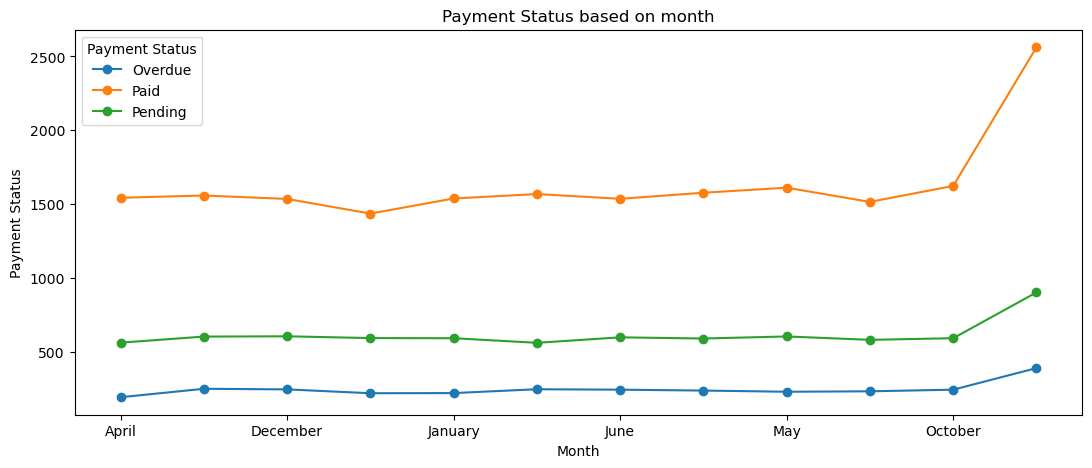

In [57]:
dff1.plot(kind="line", figsize=(13,5), marker="o")
plt.title("Payment Status based on month")
plt.xlabel("Month")
plt.ylabel("Payment Status")
plt.show()

In [58]:
df.head()

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year,month
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864,2025.0,April
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938,2025.0,March
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392,2024.0,June
3,INV122353,"Rogers, Downs and Chang",5760,2025-03-17,23,15,East Rachaelbury,Electronics,Yes,Cheque,Paid,4896.00,391,2025.0,March
4,INV104233,Santana-Huff,5756,2024-09-21,21,5,Port Ashleystad,Software,No,Cheque,Paid,5468.20,630,2024.0,September


In [59]:
df.head()

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year,month
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864,2025.0,April
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938,2025.0,March
2,INV128579,"Ruiz, Johnson and Williams",5655,2024-06-05,58,5,Jasonchester,Furniture,Yes,Bank Transfer,Paid,5372.25,1392,2024.0,June
3,INV122353,"Rogers, Downs and Chang",5760,2025-03-17,23,15,East Rachaelbury,Electronics,Yes,Cheque,Paid,4896.00,391,2025.0,March
4,INV104233,Santana-Huff,5756,2024-09-21,21,5,Port Ashleystad,Software,No,Cheque,Paid,5468.20,630,2024.0,September


In [60]:
data=df.groupby("month")["Payment Method"].value_counts().unstack()             #pivot operqation done
data

Payment Method,Bank Transfer,Cheque,Credit Card,PayPal
month,,,,
April,545,597,572,589
August,635,601,569,611
December,590,614,602,585
February,532,573,581,568
January,560,590,602,604
July,598,605,588,590
June,587,604,583,609
March,633,601,562,614
May,588,600,643,619


In [61]:
cheque_counts=data["Cheque"].sort_values(ascending=True)
cheque_counts
Bank_transfer=data["Bank Transfer"].sort_values(ascending=True)
Bank_transfer

month
February     532
April        545
January      560
November     561
June         587
May          588
December     590
July         598
March        633
August       635
October      638
September    981
Name: Bank Transfer, dtype: int64

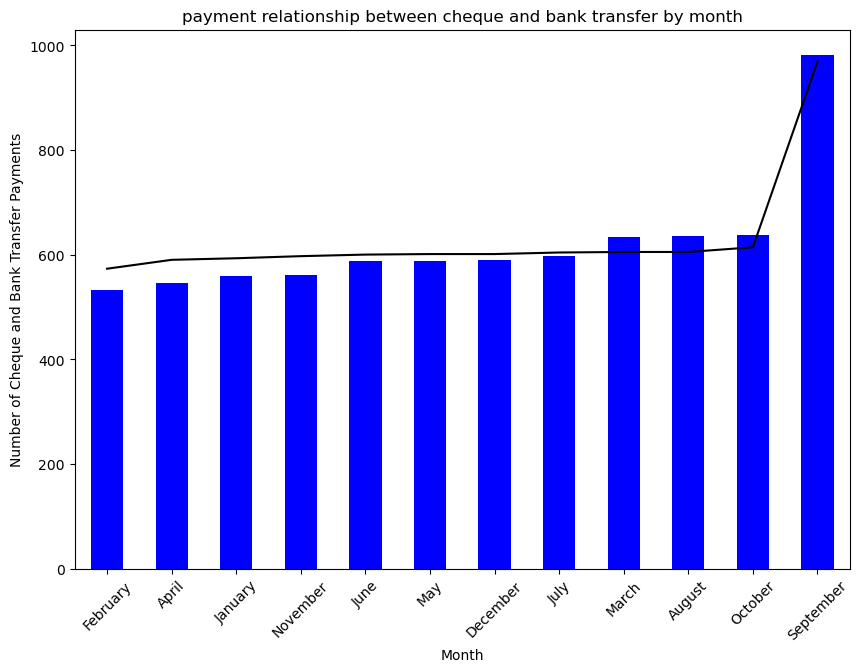

In [62]:
plt.figure(figsize=(10, 7))   
cheque_counts.plot(kind="line", color="black")
Bank_transfer.plot(kind="bar",color="blue")
plt.title("payment relationship between cheque and bank transfer by month")
plt.xlabel("Month")
plt.ylabel("Number of Cheque and Bank Transfer Payments")
plt.xticks(rotation=45)

plt.show()

In [63]:
data1=df.groupby("year")["penality charge"].sum()
data1

year
2023.0     3322566
2024.0    11197722
2025.0     7412744
Name: penality charge, dtype: int64

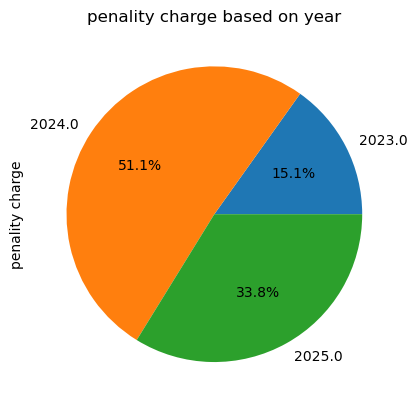

In [64]:
data1.plot(kind="pie",autopct="%1.1f%%")
plt.title("penality charge based on year")
plt.show()

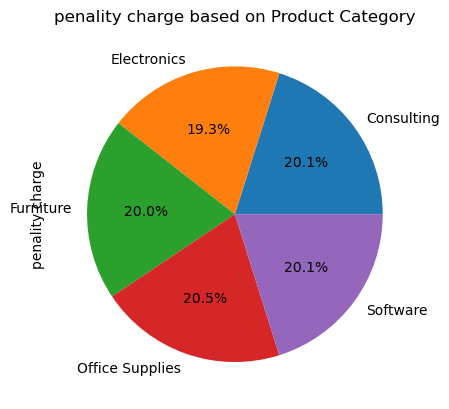

In [65]:
data2=df.groupby("Product Category")["penality charge"].sum()
data2.plot(kind="pie",autopct="%1.1f%%")
plt.title("penality charge based on Product Category")
plt.show()

In [66]:
data=df.groupby("Product Category")["Days Late"].sum()
data

Product Category
Consulting         152386
Electronics        147277
Furniture          150401
Office Supplies    153647
Software           152728
Name: Days Late, dtype: int64

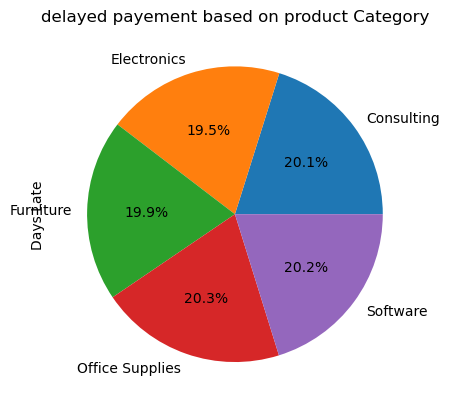

In [67]:
data.plot(kind="pie",autopct="%1.1f%%")
plt.title("delayed payement based on product Category")
plt.show()

In [68]:
df3=df.groupby("Product Category")["Payment Status"].value_counts().unstack()
df3

Payment Status,Overdue,Paid,Pending
Product Category,,,
Consulting,608,3916,1530
Electronics,578,3892,1433
Furniture,596,3953,1451
Office Supplies,619,3910,1523
Software,579,3942,1470


In [69]:
overdue=df3["Overdue"].sort_values(ascending=True)
overdue

Product Category
Electronics        578
Software           579
Furniture          596
Consulting         608
Office Supplies    619
Name: Overdue, dtype: int64

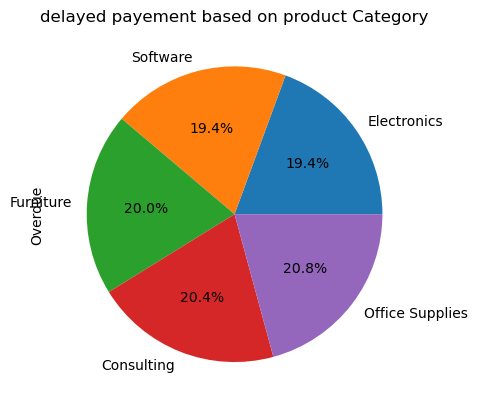

In [70]:
overdue.plot(kind="pie",autopct="%1.1f%%")
plt.title("delayed payement based on product Category")
plt.show()

In [71]:
df.head(2)

,Invoice ID,Client Name,Invoice Amount,Payment Date,Days Late,Discount,City,Product Category,Repeat Client,Payment Method,Payment Status,Paid Amount,penality charge,year,month
0,INV120069,Malone-Anthony,3680,2025-04-01,18,5,Parrishville,Electronics,Yes,Bank Transfer,Paid,3496.00,864,2025.0,April
1,INV101629,Mason LLC,6279,2025-03-03,51,5,Smithhaven,Consulting,Yes,Bank Transfer,Paid,5965.05,1938,2025.0,March


In [72]:
df3=df.groupby("Product Category")["Discount"].sum()
df3

Product Category
Consulting         34867
Electronics        33142
Furniture          32559
Office Supplies    34176
Software           33475
Name: Discount, dtype: int64

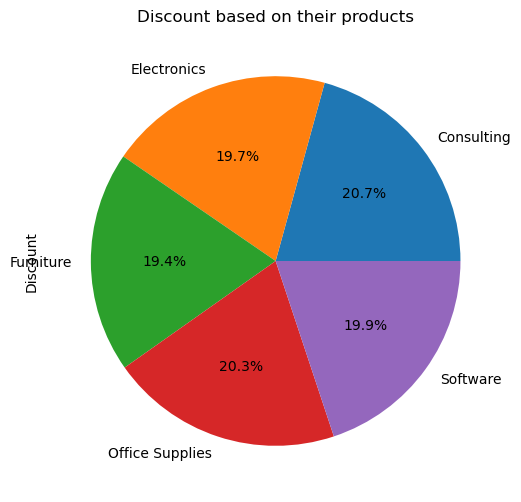

In [73]:
df3.plot(kind="pie",figsize=(10,6),autopct="%1.1f%%")
plt.title("Discount based on their products")
plt.show()

In [76]:
                                                       #summary
#----- Basic Exploration  
Checked shape, columns, index, unique values, and counts.
#- Data Types – Verified and converted column types.
- Null Handling Used histograms, filled with mean/mode.
- Outlier Detection Used boxplots and histograms; didn’t remove realistic outliers.
- Visualization Moved to charts for deeper insights.

-------------bar chart
Product Category vs Paid Amount (furniture (18416911.73)-high----(Office Supplies--17848881.03)---lowest, 
year vs paid amount(2024---47846235.51)---highest amount paid year
payment method vs days late(PayPal-- 493)---high,(Bank Transfer---479)--lowest

------------line chart
month vs penalty charge(September    2965564)---high,(April        1749440)--lowest,
city vs pay (september)--highest   (April        1749440)--lowset

----pie
penality charge based on year-2024 high,2023--low(
penality charge based on category--office supplies --high(20.3%),electronics--low(19.5%)
delayed payement based on category--office supplies --high,software(19.4%)and consulating--low(20.4%)
Discount based on their products----consulting(20.7%) --high,furniture---low(19.4%)

SyntaxError: invalid character '’' (U+2019) (3804813214.py, line 6)